<a href="https://colab.research.google.com/github/PhillipOverloeper/BarlowTwins/blob/main/Kernel_Cluster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import torch
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.optim as optim

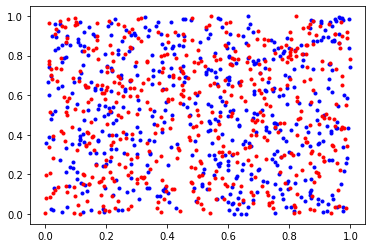

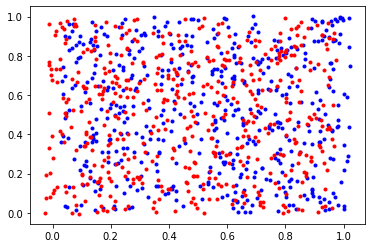

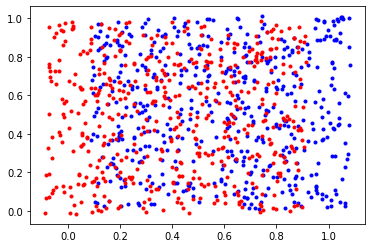

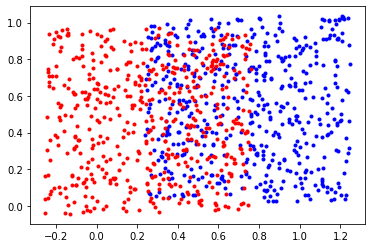

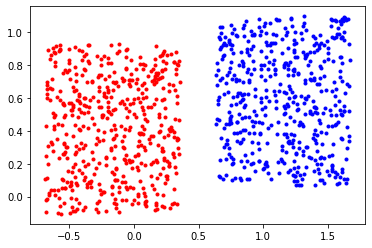

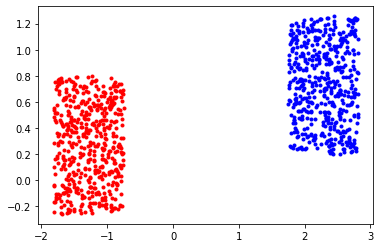

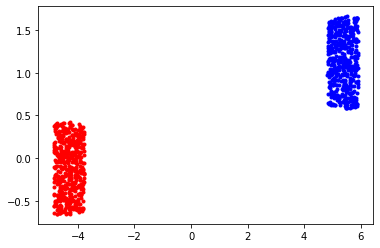

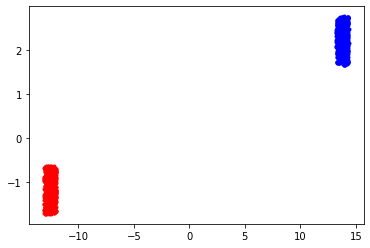

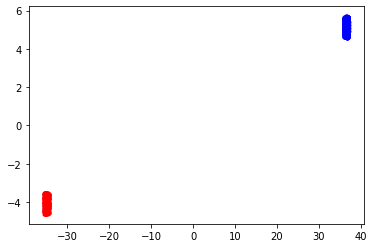

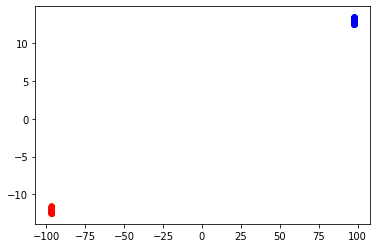

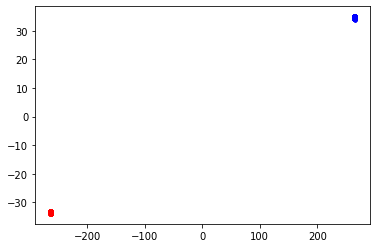

In [ ]:
N = 1000
data = torch.rand(N,2)
label = torch.ones(N)
label[:N//2] = -1
label = label[torch.randperm(N)]

plt.figure()
plt.plot(data[label==1, 0], data[label==1,1], "b.")
plt.plot(data[label==-1, 0], data[label==-1,1], "r.")
plt.show()

lr = 1e-3
sigma = 0.1
n_epochs = 10

def kernel(kerneltype,point,data,label,l,sigma):

  if kerneltype == 'gaussian':
    res = torch.exp(-torch.cdist(point.T,data[label==l]).pow_(2)/sigma)
  elif kerneltype == 'poly':
    pass
  else:
    pass

  return res


for epoch in range(n_epochs):
    perm = torch.randperm(N)
    data = data[perm]
    label = label[perm]
    for l, point in zip(label,data):   
        point_resh = point.reshape([2,1])

        first = kernel('gaussian',point_resh,data,label,l,sigma,lr)
        second = kernel('gaussian',point_resh,data,label,-l,sigma,lr)

        data[label==l] += lr*torch.mul((1-first.T),(point-data[label==l]))

        data[label==-l] -= lr*torch.mul((1-second.T),(point-data[label==-l]))
        

    if epoch % 1 == 0:
      plt.figure()
      plt.plot(data[label==1, 0], data[label==1,1], "b.")
      plt.plot(data[label==-1, 0], data[label==-1,1], "r.")
      plt.show()



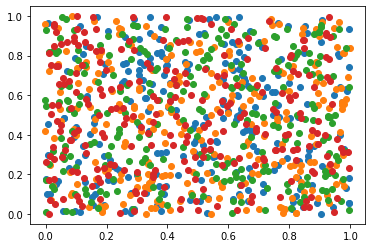

tensor(0.2438, grad_fn=<MseLossBackward0>)
0


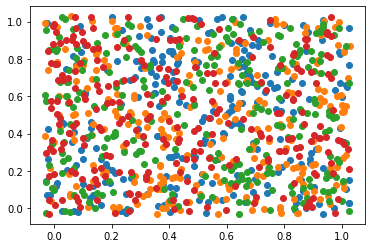

tensor(0.2372, grad_fn=<MseLossBackward0>)
30


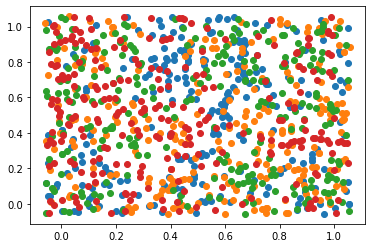

tensor(0.2313, grad_fn=<MseLossBackward0>)
60


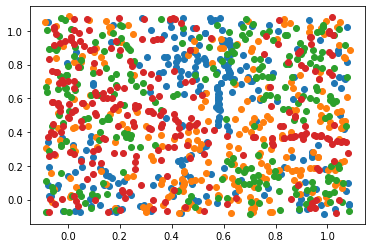

tensor(0.2251, grad_fn=<MseLossBackward0>)
90


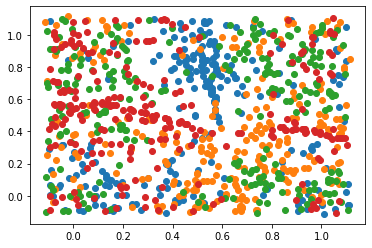

tensor(0.2181, grad_fn=<MseLossBackward0>)
120


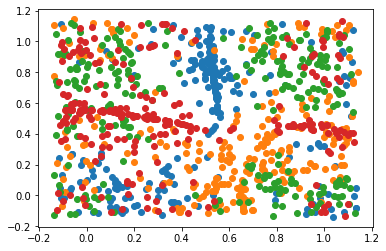

tensor(0.2107, grad_fn=<MseLossBackward0>)
150


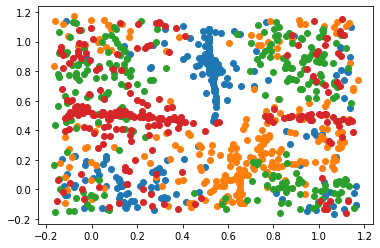

tensor(0.2031, grad_fn=<MseLossBackward0>)
180


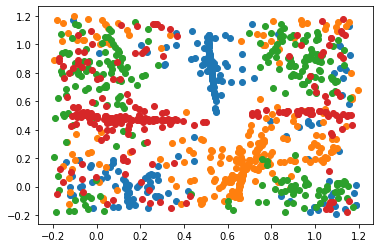

tensor(0.1954, grad_fn=<MseLossBackward0>)
210


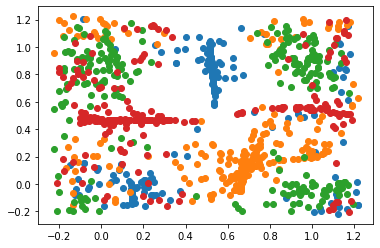

tensor(0.1878, grad_fn=<MseLossBackward0>)
240


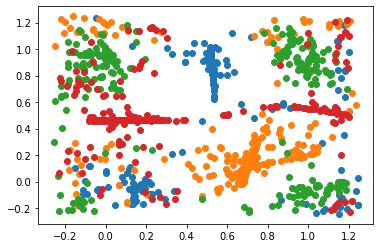

tensor(0.1804, grad_fn=<MseLossBackward0>)
270


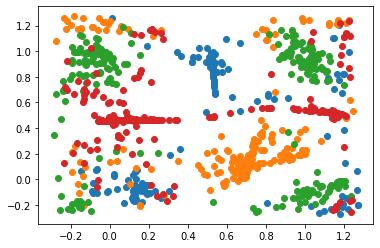

tensor(0.1735, grad_fn=<MseLossBackward0>)
300


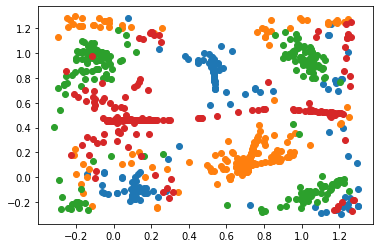

tensor(0.1671, grad_fn=<MseLossBackward0>)
330


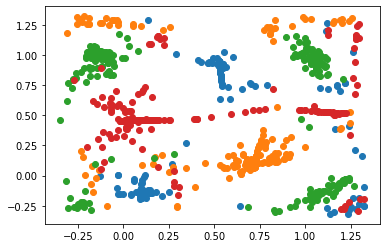

tensor(0.1615, grad_fn=<MseLossBackward0>)
360


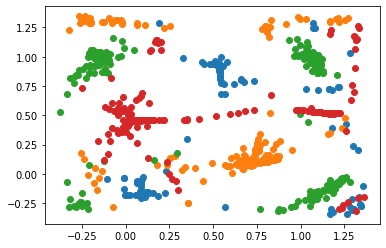

tensor(0.1567, grad_fn=<MseLossBackward0>)
390


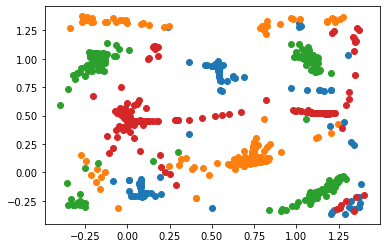

tensor(0.1526, grad_fn=<MseLossBackward0>)
420


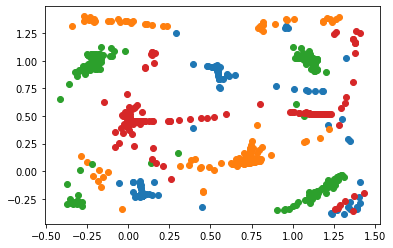

tensor(0.1490, grad_fn=<MseLossBackward0>)
450


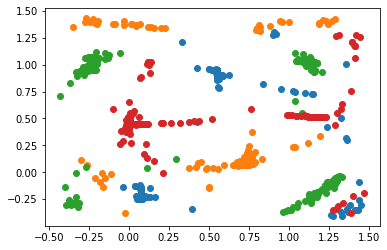

tensor(0.1458, grad_fn=<MseLossBackward0>)
480


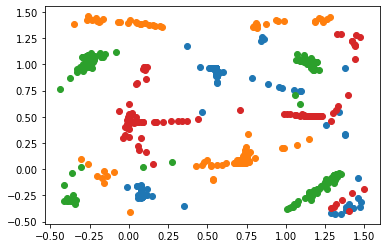

tensor(0.1428, grad_fn=<MseLossBackward0>)
510


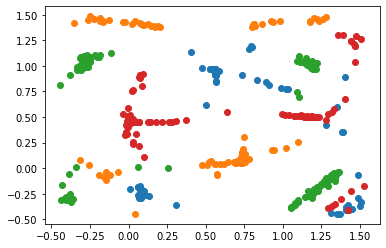

tensor(0.1401, grad_fn=<MseLossBackward0>)
540


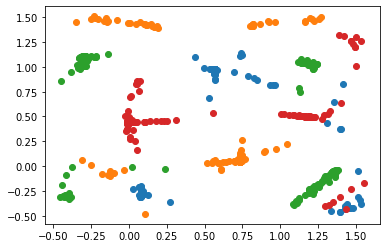

tensor(0.1377, grad_fn=<MseLossBackward0>)
570


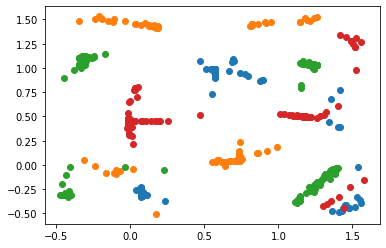

tensor(0.1356, grad_fn=<MseLossBackward0>)
600


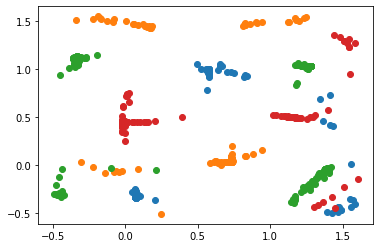

tensor(0.1338, grad_fn=<MseLossBackward0>)
630


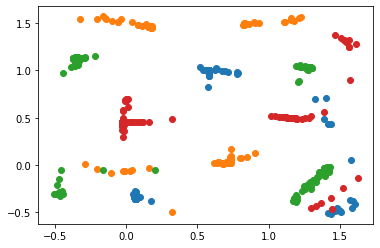

tensor(0.1322, grad_fn=<MseLossBackward0>)
660


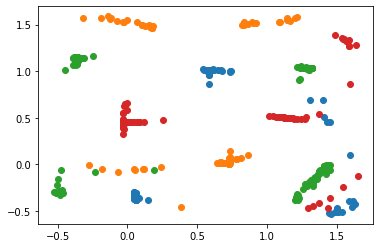

tensor(0.1307, grad_fn=<MseLossBackward0>)
690


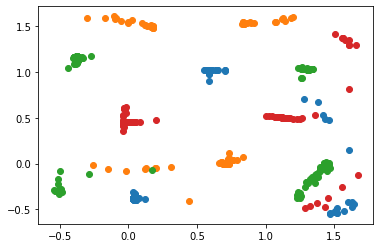

tensor(0.1293, grad_fn=<MseLossBackward0>)
720


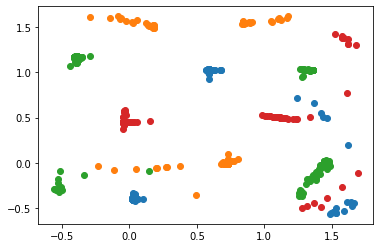

tensor(0.1280, grad_fn=<MseLossBackward0>)
750


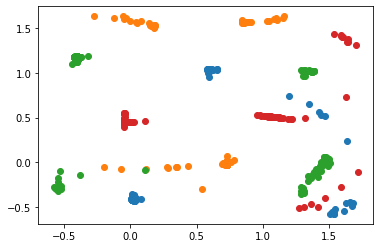

tensor(0.1268, grad_fn=<MseLossBackward0>)
780


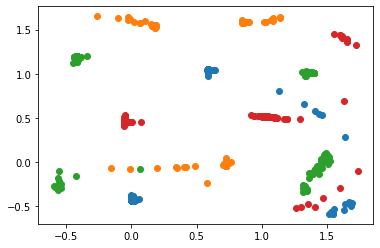

tensor(0.1256, grad_fn=<MseLossBackward0>)
810


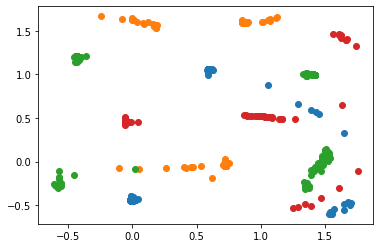

tensor(0.1243, grad_fn=<MseLossBackward0>)
840


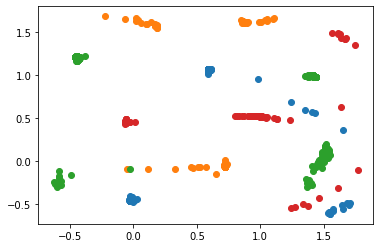

tensor(0.1231, grad_fn=<MseLossBackward0>)
870


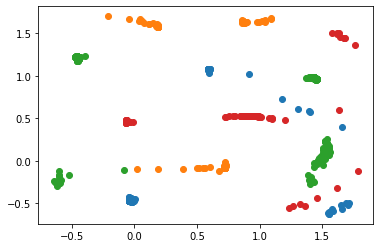

tensor(0.1217, grad_fn=<MseLossBackward0>)
900


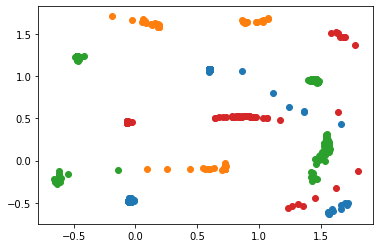

tensor(0.1202, grad_fn=<MseLossBackward0>)
930


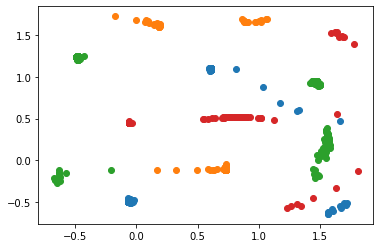

tensor(0.1185, grad_fn=<MseLossBackward0>)
960


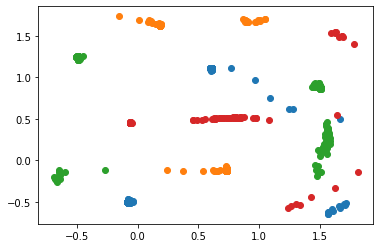

tensor(0.1165, grad_fn=<MseLossBackward0>)
990


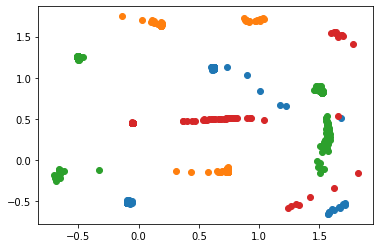

tensor(0.1143, grad_fn=<MseLossBackward0>)
1020


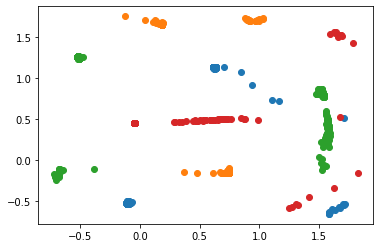

tensor(0.1118, grad_fn=<MseLossBackward0>)
1050


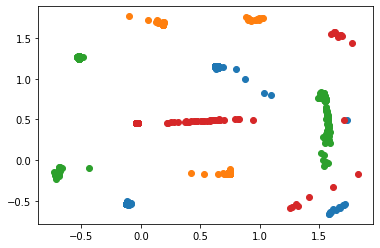

tensor(0.1092, grad_fn=<MseLossBackward0>)
1080


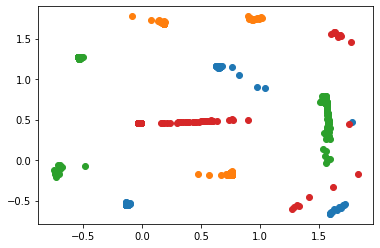

tensor(0.1066, grad_fn=<MseLossBackward0>)
1110


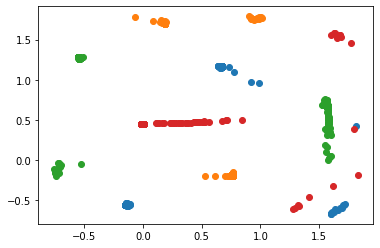

tensor(0.1042, grad_fn=<MseLossBackward0>)
1140


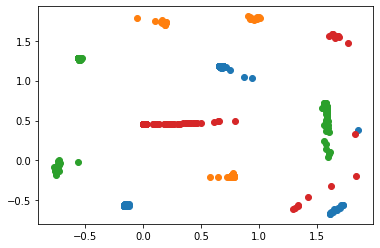

tensor(0.1021, grad_fn=<MseLossBackward0>)
1170


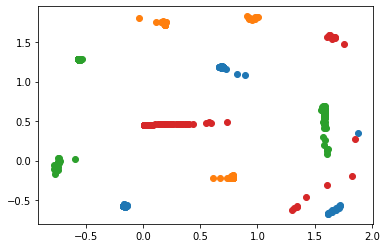

tensor(0.1003, grad_fn=<MseLossBackward0>)
1200


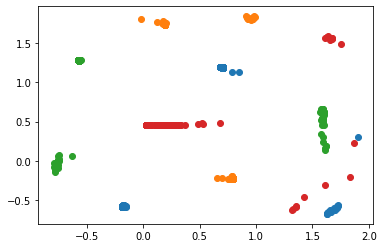

tensor(0.0988, grad_fn=<MseLossBackward0>)
1230


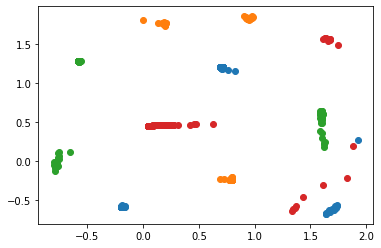

tensor(0.0977, grad_fn=<MseLossBackward0>)
1260


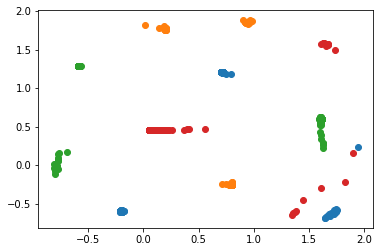

tensor(0.0968, grad_fn=<MseLossBackward0>)
1290


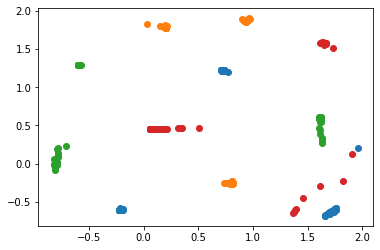

tensor(0.0962, grad_fn=<MseLossBackward0>)
1320


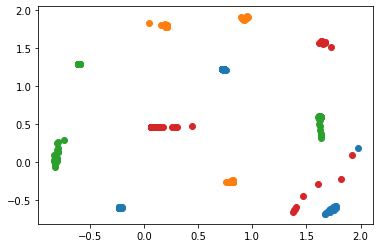

tensor(0.0956, grad_fn=<MseLossBackward0>)
1350


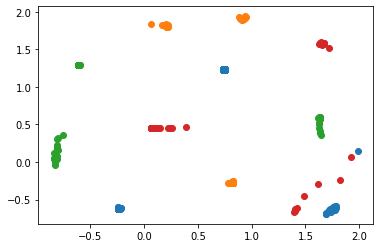

tensor(0.0952, grad_fn=<MseLossBackward0>)
1380


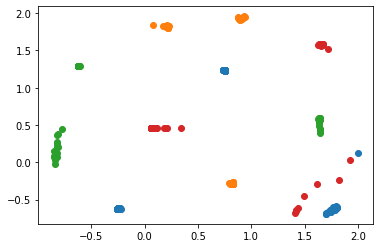

tensor(0.0948, grad_fn=<MseLossBackward0>)
1410


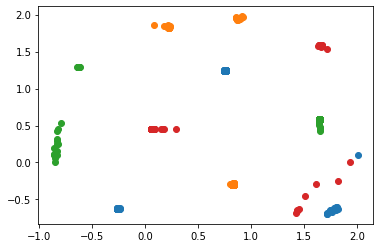

tensor(0.0944, grad_fn=<MseLossBackward0>)
1440


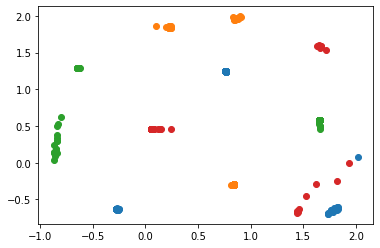

tensor(0.0941, grad_fn=<MseLossBackward0>)
1470


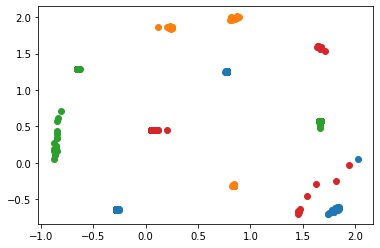

tensor(0.0938, grad_fn=<MseLossBackward0>)
1500


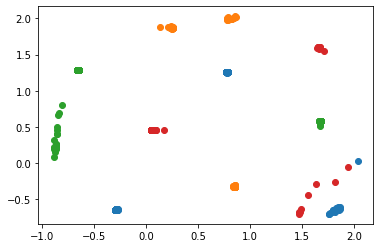

tensor(0.0935, grad_fn=<MseLossBackward0>)
1530


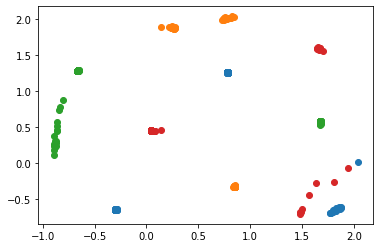

tensor(0.0932, grad_fn=<MseLossBackward0>)
1560


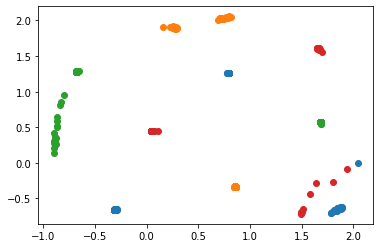

tensor(0.0929, grad_fn=<MseLossBackward0>)
1590


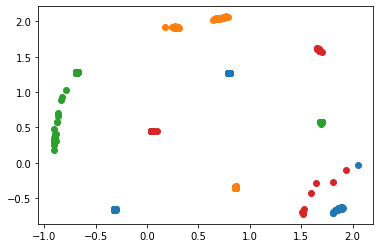

tensor(0.0926, grad_fn=<MseLossBackward0>)
1620


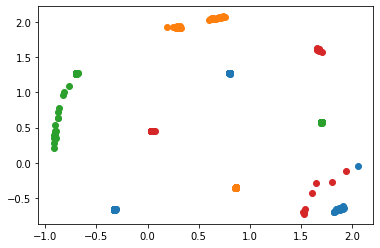

tensor(0.0923, grad_fn=<MseLossBackward0>)
1650


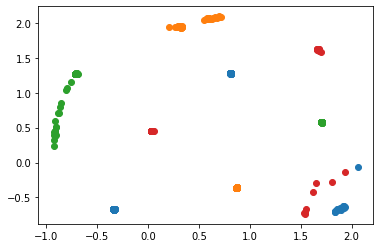

tensor(0.0920, grad_fn=<MseLossBackward0>)
1680


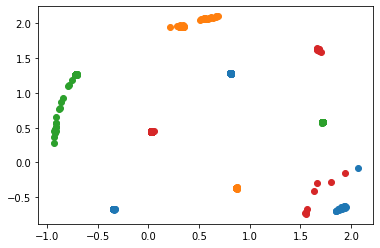

tensor(0.0917, grad_fn=<MseLossBackward0>)
1710


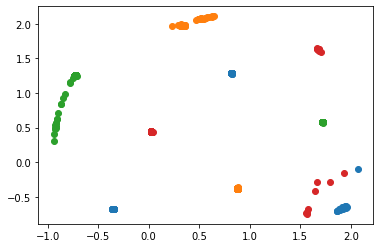

tensor(0.0914, grad_fn=<MseLossBackward0>)
1740


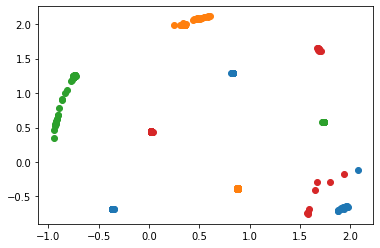

tensor(0.0910, grad_fn=<MseLossBackward0>)
1770


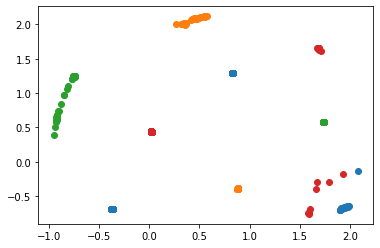

tensor(0.0908, grad_fn=<MseLossBackward0>)
1800


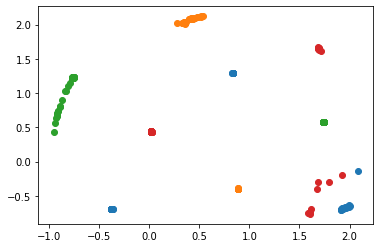

tensor(0.0905, grad_fn=<MseLossBackward0>)
1830


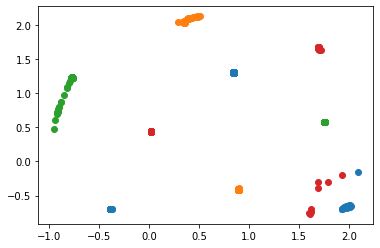

tensor(0.0902, grad_fn=<MseLossBackward0>)
1860


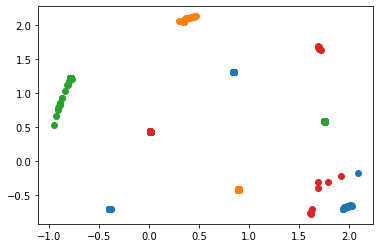

tensor(0.0899, grad_fn=<MseLossBackward0>)
1890


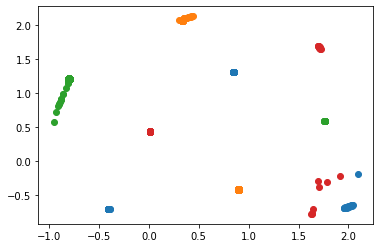

tensor(0.0897, grad_fn=<MseLossBackward0>)
1920


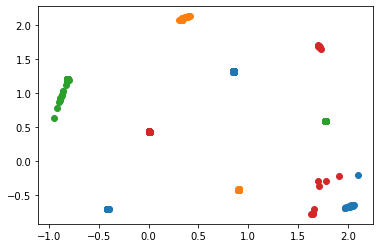

tensor(0.0895, grad_fn=<MseLossBackward0>)
1950


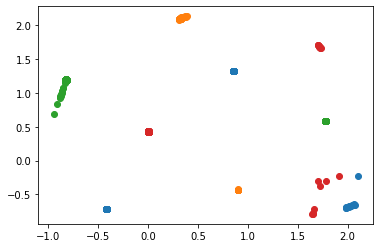

tensor(0.0893, grad_fn=<MseLossBackward0>)
1980


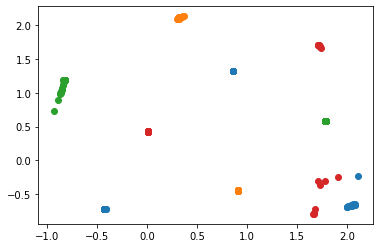

tensor(0.0891, grad_fn=<MseLossBackward0>)
2010


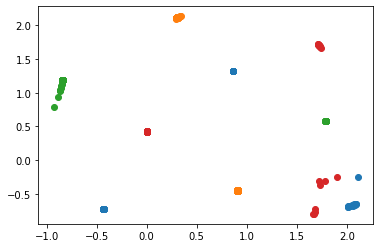

tensor(0.0889, grad_fn=<MseLossBackward0>)
2040


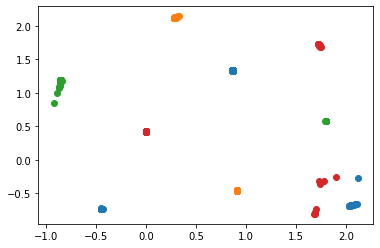

tensor(0.0888, grad_fn=<MseLossBackward0>)
2070


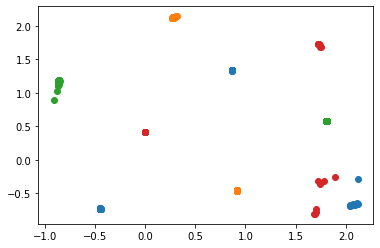

tensor(0.0887, grad_fn=<MseLossBackward0>)
2100


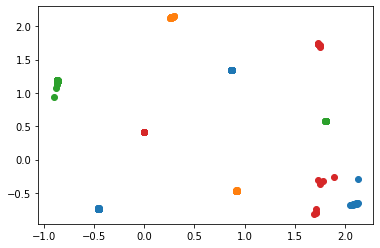

tensor(0.0886, grad_fn=<MseLossBackward0>)
2130


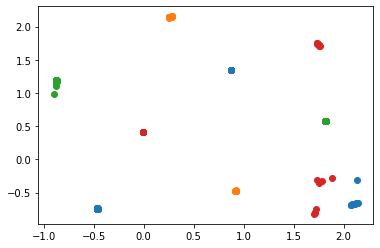

tensor(0.0885, grad_fn=<MseLossBackward0>)
2160


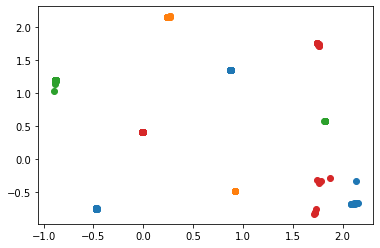

tensor(0.0885, grad_fn=<MseLossBackward0>)
2190


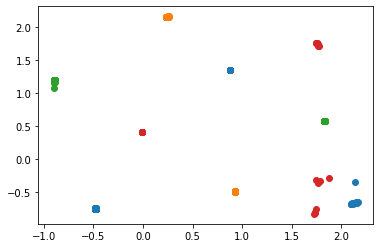

tensor(0.0884, grad_fn=<MseLossBackward0>)
2220


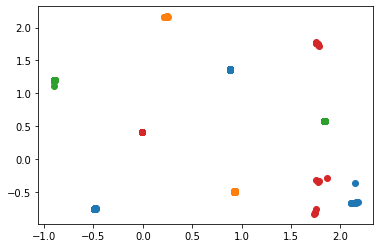

tensor(0.0883, grad_fn=<MseLossBackward0>)
2250


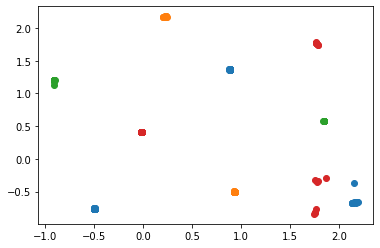

tensor(0.0883, grad_fn=<MseLossBackward0>)
2280


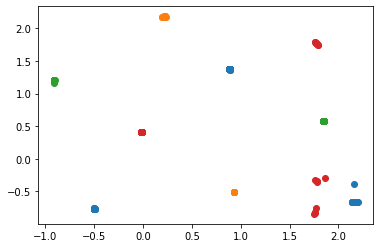

tensor(0.0882, grad_fn=<MseLossBackward0>)
2310


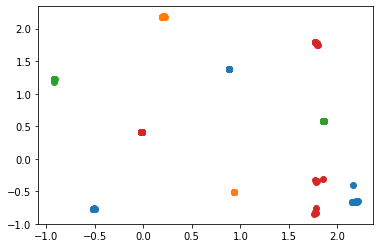

tensor(0.0882, grad_fn=<MseLossBackward0>)
2340


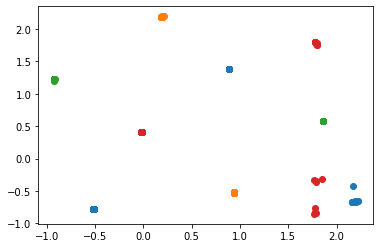

tensor(0.0881, grad_fn=<MseLossBackward0>)
2370


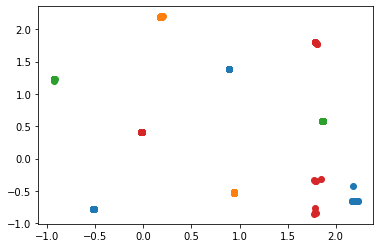

tensor(0.0881, grad_fn=<MseLossBackward0>)
2400


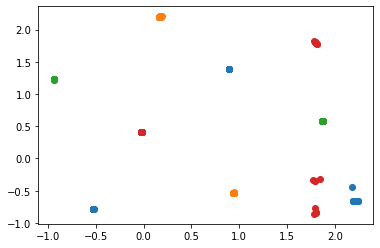

tensor(0.0880, grad_fn=<MseLossBackward0>)
2430


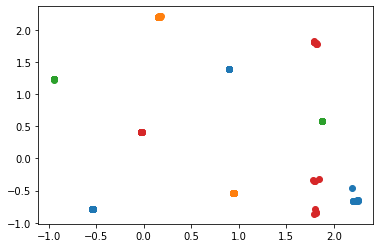

tensor(0.0880, grad_fn=<MseLossBackward0>)
2460


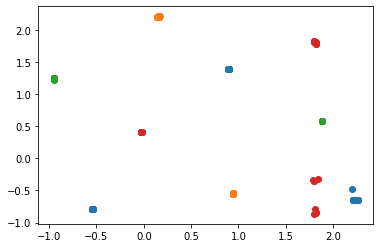

tensor(0.0879, grad_fn=<MseLossBackward0>)
2490


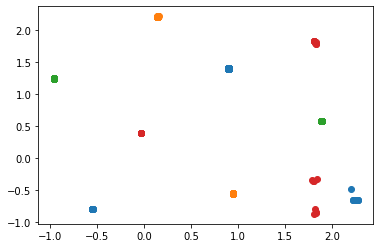

tensor(0.0879, grad_fn=<MseLossBackward0>)
2520


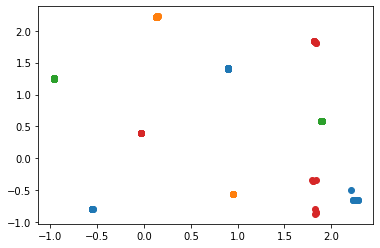

tensor(0.0878, grad_fn=<MseLossBackward0>)
2550


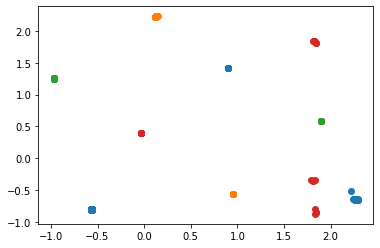

tensor(0.0878, grad_fn=<MseLossBackward0>)
2580


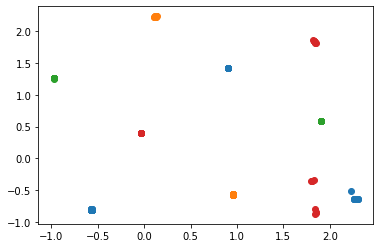

tensor(0.0878, grad_fn=<MseLossBackward0>)
2610


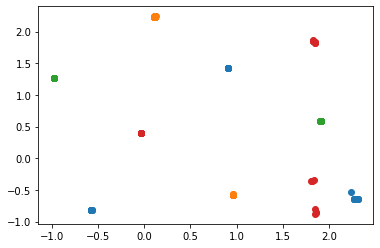

tensor(0.0877, grad_fn=<MseLossBackward0>)
2640


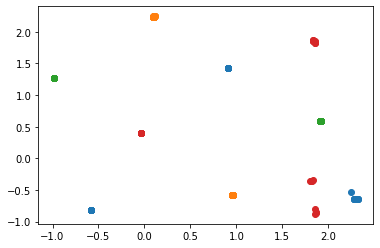

tensor(0.0877, grad_fn=<MseLossBackward0>)
2670


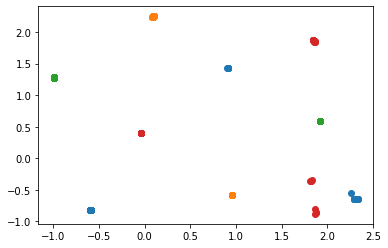

tensor(0.0877, grad_fn=<MseLossBackward0>)
2700


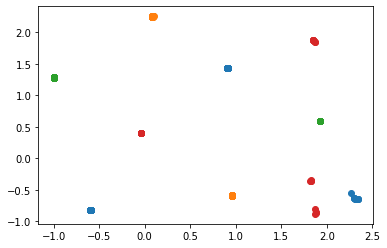

tensor(0.0876, grad_fn=<MseLossBackward0>)
2730


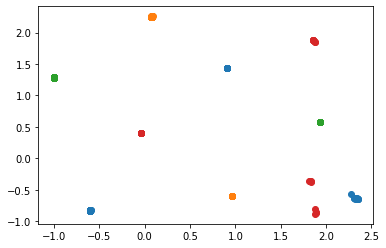

tensor(0.0876, grad_fn=<MseLossBackward0>)
2760


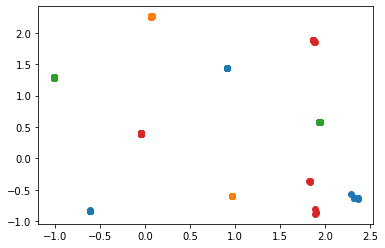

tensor(0.0876, grad_fn=<MseLossBackward0>)
2790


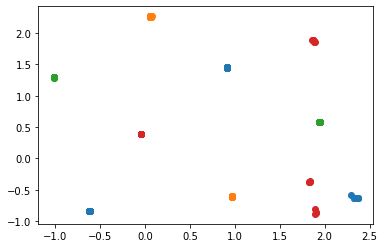

tensor(0.0875, grad_fn=<MseLossBackward0>)
2820


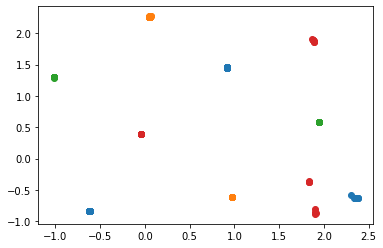

tensor(0.0875, grad_fn=<MseLossBackward0>)
2850


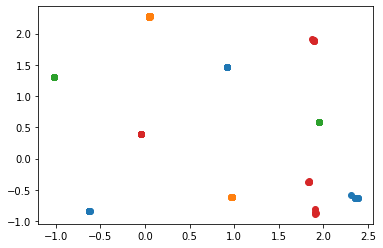

tensor(0.0875, grad_fn=<MseLossBackward0>)
2880


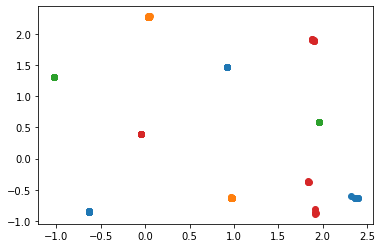

tensor(0.0875, grad_fn=<MseLossBackward0>)
2910


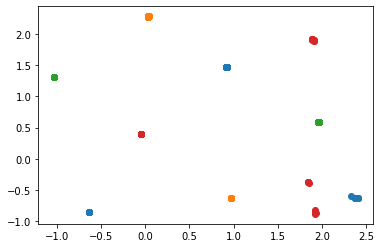

tensor(0.0874, grad_fn=<MseLossBackward0>)
2940


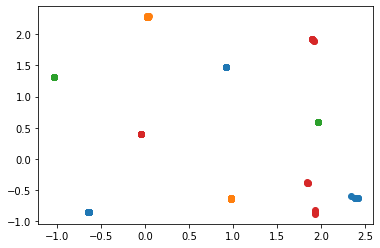

tensor(0.0874, grad_fn=<MseLossBackward0>)
2970


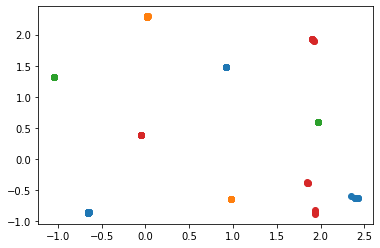

tensor(0.0874, grad_fn=<MseLossBackward0>)
3000


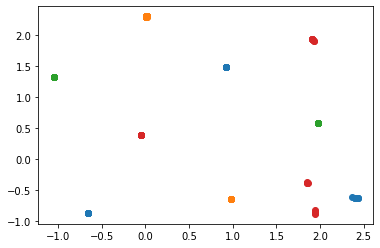

tensor(0.0874, grad_fn=<MseLossBackward0>)
3030


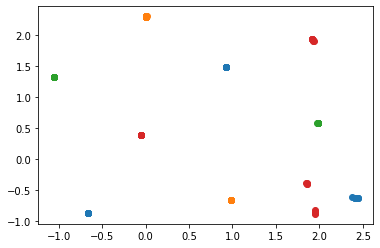

tensor(0.0873, grad_fn=<MseLossBackward0>)
3060


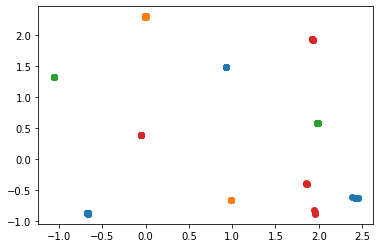

tensor(0.0873, grad_fn=<MseLossBackward0>)
3090


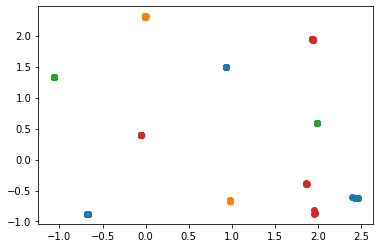

tensor(0.0873, grad_fn=<MseLossBackward0>)
3120


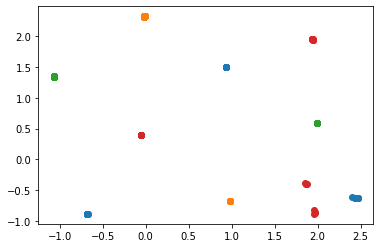

tensor(0.0873, grad_fn=<MseLossBackward0>)
3150


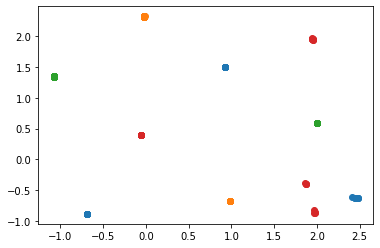

tensor(0.0873, grad_fn=<MseLossBackward0>)
3180


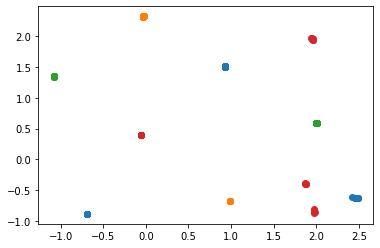

tensor(0.0872, grad_fn=<MseLossBackward0>)
3210


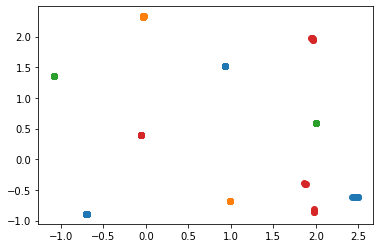

tensor(0.0872, grad_fn=<MseLossBackward0>)
3240


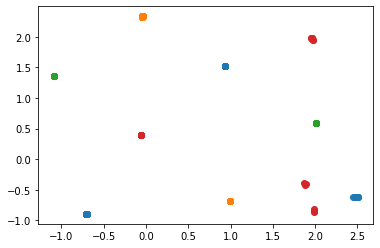

tensor(0.0872, grad_fn=<MseLossBackward0>)
3270


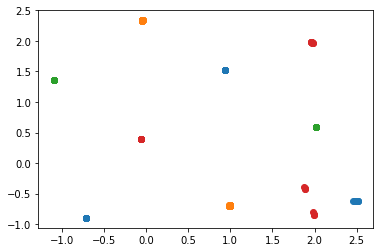

tensor(0.0872, grad_fn=<MseLossBackward0>)
3300


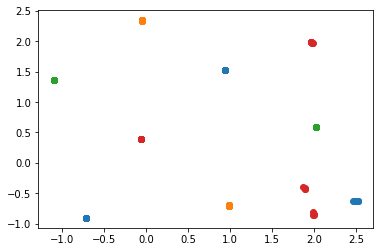

tensor(0.0872, grad_fn=<MseLossBackward0>)
3330


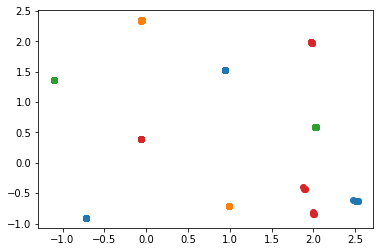

tensor(0.0871, grad_fn=<MseLossBackward0>)
3360


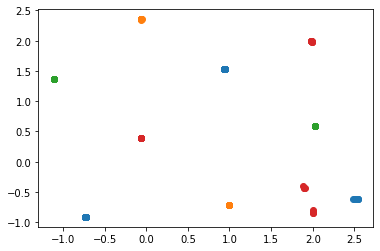

tensor(0.0871, grad_fn=<MseLossBackward0>)
3390


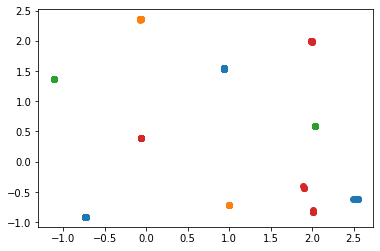

tensor(0.0871, grad_fn=<MseLossBackward0>)
3420


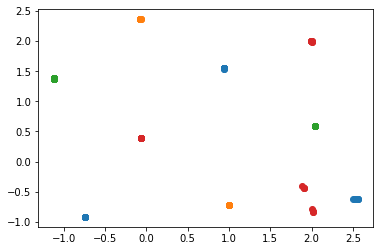

tensor(0.0871, grad_fn=<MseLossBackward0>)
3450


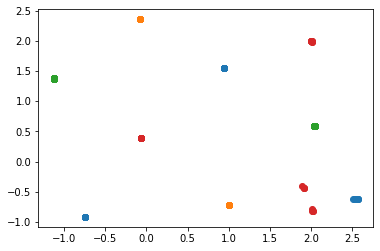

tensor(0.0871, grad_fn=<MseLossBackward0>)
3480


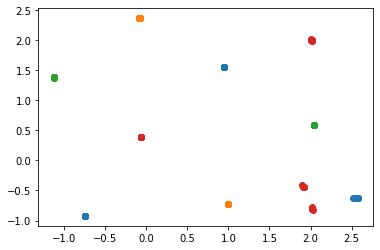

tensor(0.0871, grad_fn=<MseLossBackward0>)
3510


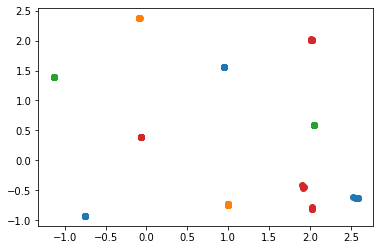

tensor(0.0871, grad_fn=<MseLossBackward0>)
3540


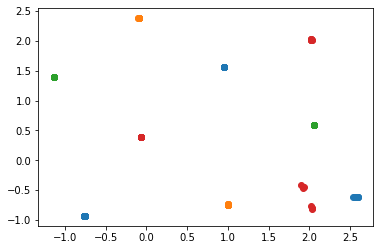

tensor(0.0870, grad_fn=<MseLossBackward0>)
3570


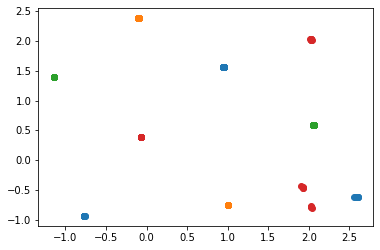

tensor(0.0870, grad_fn=<MseLossBackward0>)
3600


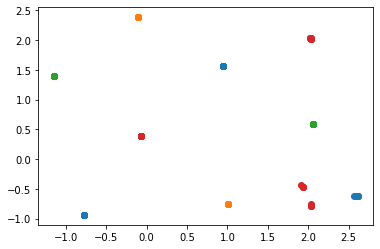

tensor(0.0870, grad_fn=<MseLossBackward0>)
3630


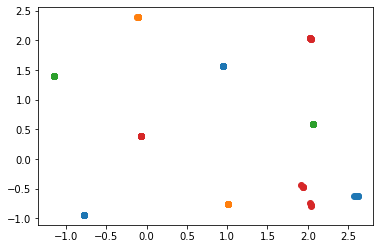

tensor(0.0870, grad_fn=<MseLossBackward0>)
3660


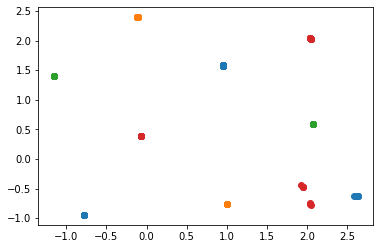

tensor(0.0870, grad_fn=<MseLossBackward0>)
3690


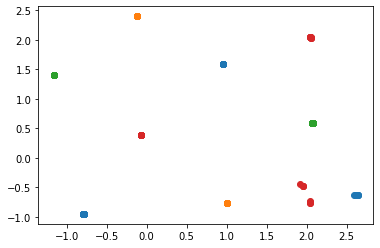

tensor(0.0870, grad_fn=<MseLossBackward0>)
3720


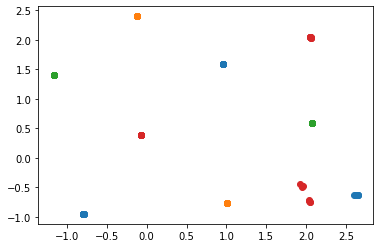

tensor(0.0870, grad_fn=<MseLossBackward0>)
3750


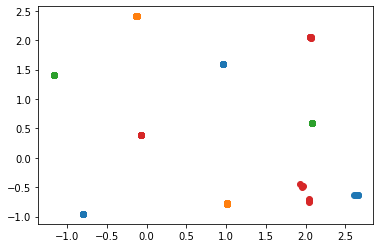

tensor(0.0869, grad_fn=<MseLossBackward0>)
3780


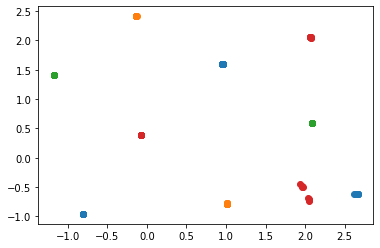

tensor(0.0869, grad_fn=<MseLossBackward0>)
3810


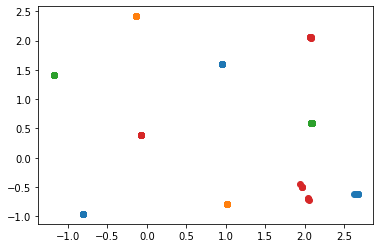

tensor(0.0869, grad_fn=<MseLossBackward0>)
3840


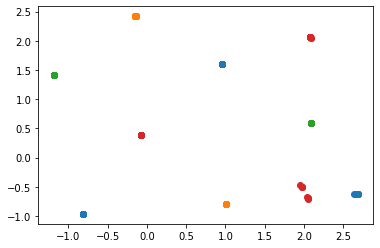

tensor(0.0869, grad_fn=<MseLossBackward0>)
3870


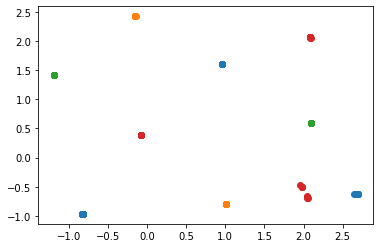

tensor(0.0869, grad_fn=<MseLossBackward0>)
3900


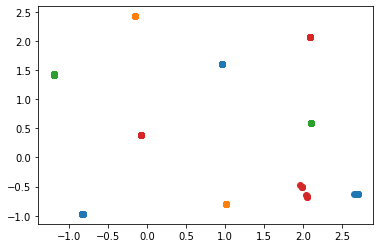

tensor(0.0869, grad_fn=<MseLossBackward0>)
3930


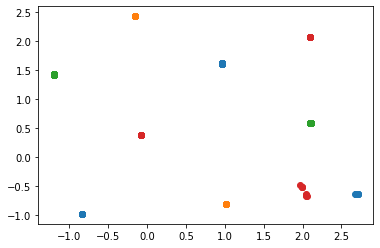

tensor(0.0869, grad_fn=<MseLossBackward0>)
3960


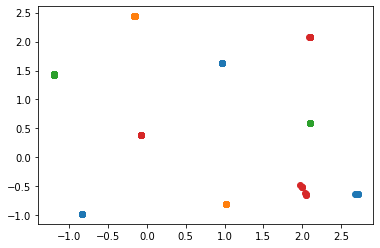

tensor(0.0869, grad_fn=<MseLossBackward0>)
3990


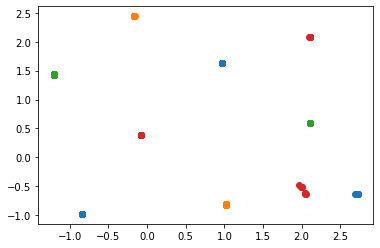

tensor(0.0869, grad_fn=<MseLossBackward0>)
4020


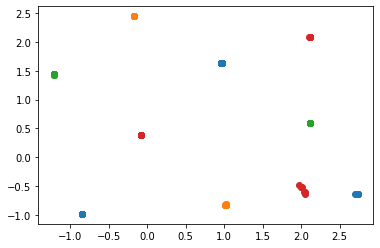

tensor(0.0868, grad_fn=<MseLossBackward0>)
4050


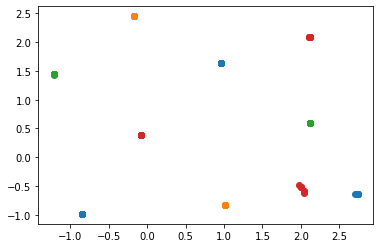

tensor(0.0868, grad_fn=<MseLossBackward0>)
4080


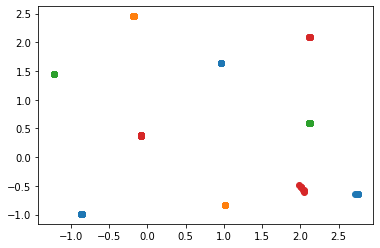

tensor(0.0868, grad_fn=<MseLossBackward0>)
4110


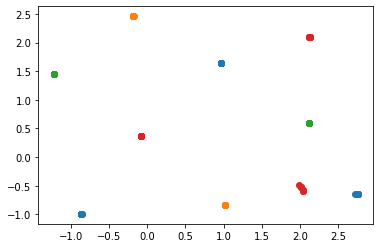

tensor(0.0868, grad_fn=<MseLossBackward0>)
4140


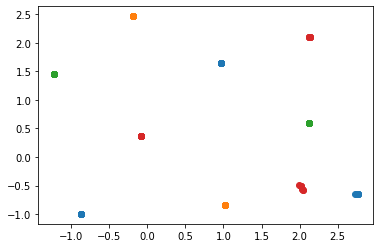

tensor(0.0868, grad_fn=<MseLossBackward0>)
4170


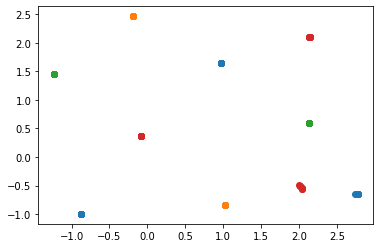

tensor(0.0868, grad_fn=<MseLossBackward0>)
4200


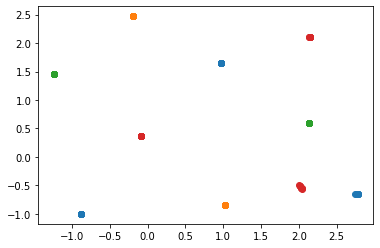

tensor(0.0868, grad_fn=<MseLossBackward0>)
4230


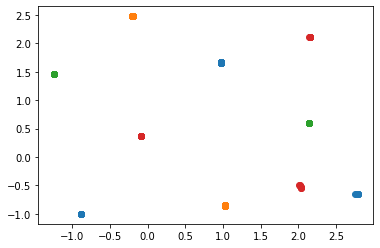

tensor(0.0868, grad_fn=<MseLossBackward0>)
4260


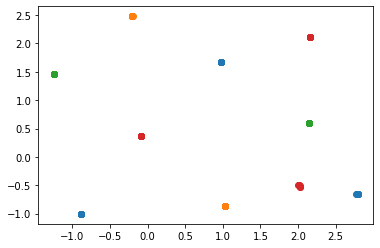

tensor(0.0868, grad_fn=<MseLossBackward0>)
4290


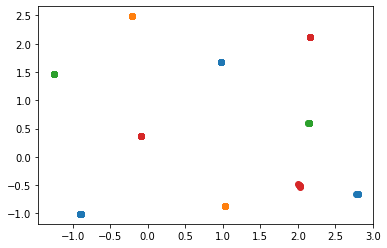

tensor(0.0868, grad_fn=<MseLossBackward0>)
4320


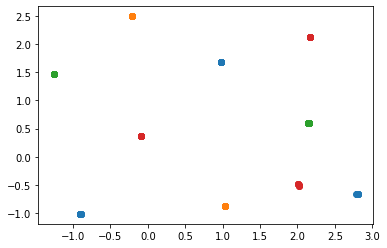

tensor(0.0868, grad_fn=<MseLossBackward0>)
4350


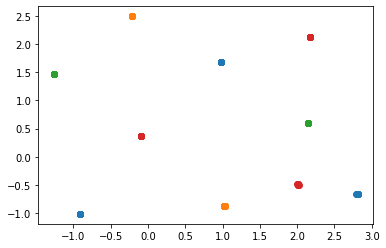

tensor(0.0868, grad_fn=<MseLossBackward0>)
4380


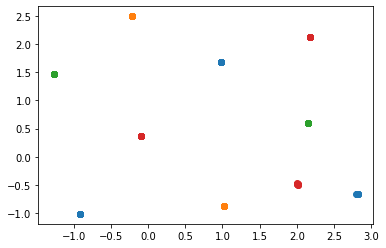

tensor(0.0867, grad_fn=<MseLossBackward0>)
4410


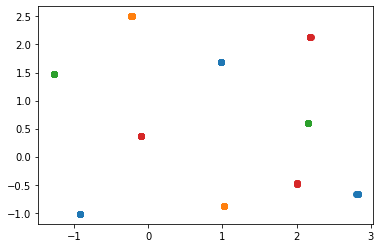

tensor(0.0867, grad_fn=<MseLossBackward0>)
4440


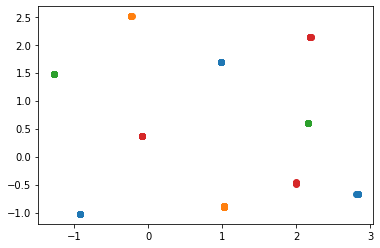

tensor(0.0867, grad_fn=<MseLossBackward0>)
4470


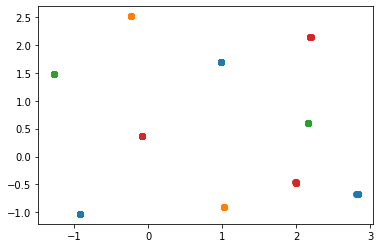

tensor(0.0867, grad_fn=<MseLossBackward0>)
4500


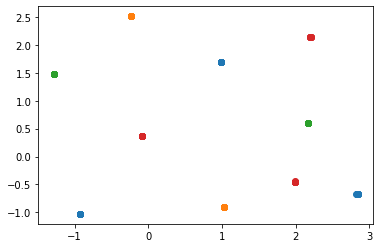

tensor(0.0867, grad_fn=<MseLossBackward0>)
4530


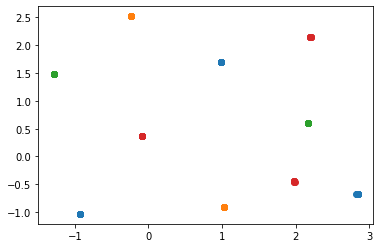

tensor(0.0867, grad_fn=<MseLossBackward0>)
4560


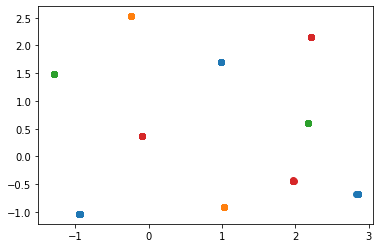

tensor(0.0867, grad_fn=<MseLossBackward0>)
4590


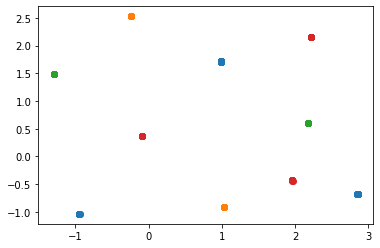

tensor(0.0867, grad_fn=<MseLossBackward0>)
4620


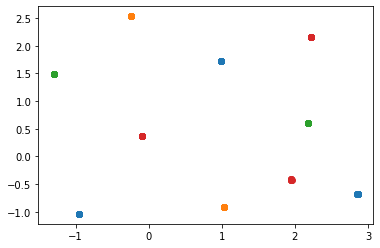

tensor(0.0867, grad_fn=<MseLossBackward0>)
4650


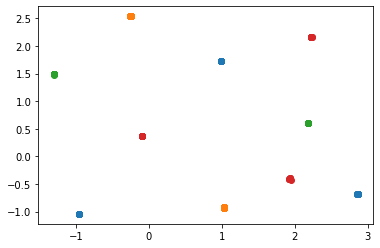

tensor(0.0867, grad_fn=<MseLossBackward0>)
4680


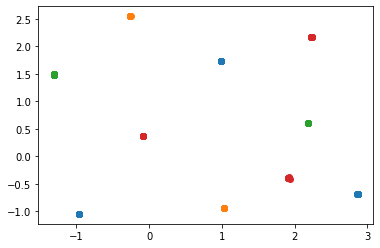

tensor(0.0867, grad_fn=<MseLossBackward0>)
4710


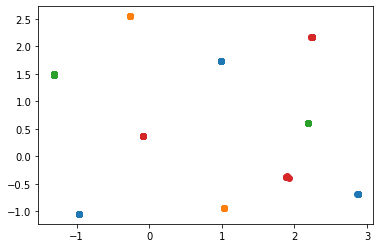

tensor(0.0867, grad_fn=<MseLossBackward0>)
4740


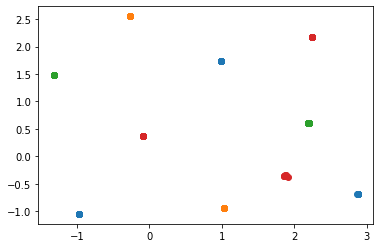

tensor(0.0866, grad_fn=<MseLossBackward0>)
4770


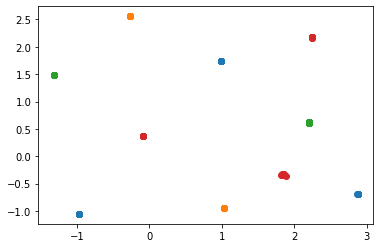

tensor(0.0866, grad_fn=<MseLossBackward0>)
4800


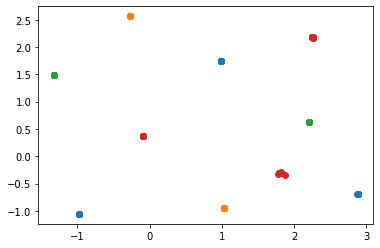

tensor(0.0866, grad_fn=<MseLossBackward0>)
4830


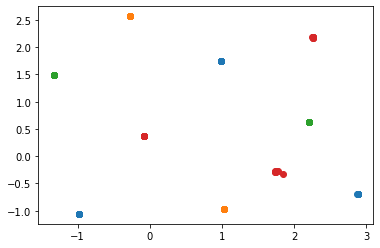

tensor(0.0866, grad_fn=<MseLossBackward0>)
4860


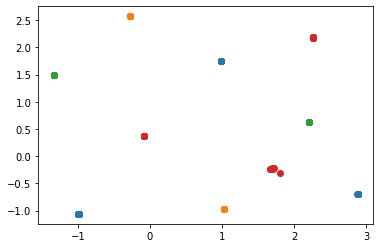

tensor(0.0866, grad_fn=<MseLossBackward0>)
4890


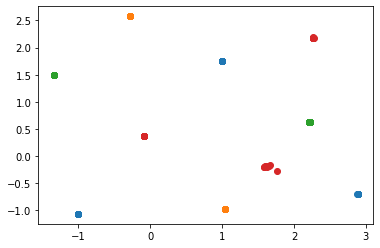

tensor(0.0865, grad_fn=<MseLossBackward0>)
4920


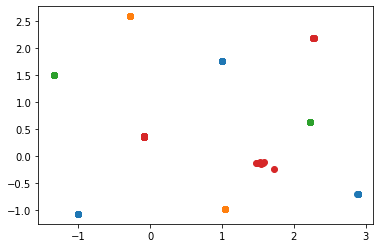

tensor(0.0865, grad_fn=<MseLossBackward0>)
4950


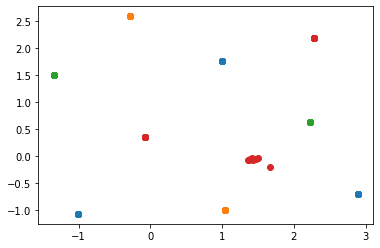

tensor(0.0864, grad_fn=<MseLossBackward0>)
4980
tensor([[1.0000e+00, 1.0000e+00, 9.5446e-04,  ..., 2.8979e-02, 2.8933e-02,
         2.8976e-02],
        [1.0000e+00, 1.0000e+00, 9.5477e-04,  ..., 2.8988e-02, 2.8943e-02,
         2.8985e-02],
        [9.5446e-04, 9.5477e-04, 1.0000e+00,  ..., 3.2801e-02, 3.2848e-02,
         3.2805e-02],
        ...,
        [2.8979e-02, 2.8988e-02, 3.2801e-02,  ..., 9.9965e-01, 9.9744e-01,
         9.9965e-01],
        [2.8933e-02, 2.8943e-02, 3.2848e-02,  ..., 9.9744e-01, 1.0000e+00,
         9.9751e-01],
        [2.8976e-02, 2.8985e-02, 3.2805e-02,  ..., 9.9965e-01, 9.9751e-01,
         1.0000e+00]], grad_fn=<ExpBackward0>)


In [48]:
class Punkte(nn.Module):
  def __init__(self,n=1000,d=2,n_label=4):
    super().__init__()
    self.data = nn.Parameter(torch.rand(1000,2),requires_grad=True)
    self.label = torch.outer(torch.arange(n_label),torch.ones(n//n_label)).flatten()
    self.ones = torch.ones(n//4,n//4)
    self.label_matrix = torch.block_diag(self.ones,self.ones,self.ones,self.ones)

    self.sigma = .5
    self.n_label = n_label

  def forward(self):
    x = torch.exp(-torch.cdist(self.data,self.data,p=2)/self.sigma)

    return x

  def plot(self):
    plt.figure()
    for index in range(self.n_label):
      plt.scatter(model.data[model.label==index, 0].detach().numpy(), model.data[model.label==index,1].detach().numpy())
    plt.show()


n_epochs = 5000
model = Punkte()
M_loss = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)




for epoch in range(n_epochs):
  optimizer.zero_grad()
  output = model()
  loss = M_loss(output,model.label_matrix)
  #print(loss)
  loss.backward()
  optimizer.step()
  if epoch % 30 == 0:
    model.plot()
    print(loss)
    print(epoch)
  if epoch == n_epochs - 1:
    print(model())
    




